<a href="https://colab.research.google.com/github/SaifulIslamRana/Google-Sheets/blob/main/potato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [13]:
img_size = 256
btch_size = 32
epochs = 50
chnl = 3

In [14]:
potato_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/potato-disease-classification",
    shuffle = False
)

Found 2153 files belonging to 3 classes.


In [15]:
dir(tf.keras.preprocessing)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'image',
 'image_dataset_from_directory',
 'sequence',
 'text',
 'text_dataset_from_directory',
 'timeseries_dataset_from_array']

In [16]:
class_names = potato_data.class_names
print("The class names are:",class_names)

The class names are: ['Potato__Early__Blight', 'Potato__Healthy', 'Potato__Late__Blight']


In [17]:
length = len(potato_data)
print("Total data:",length)

Total data: 68


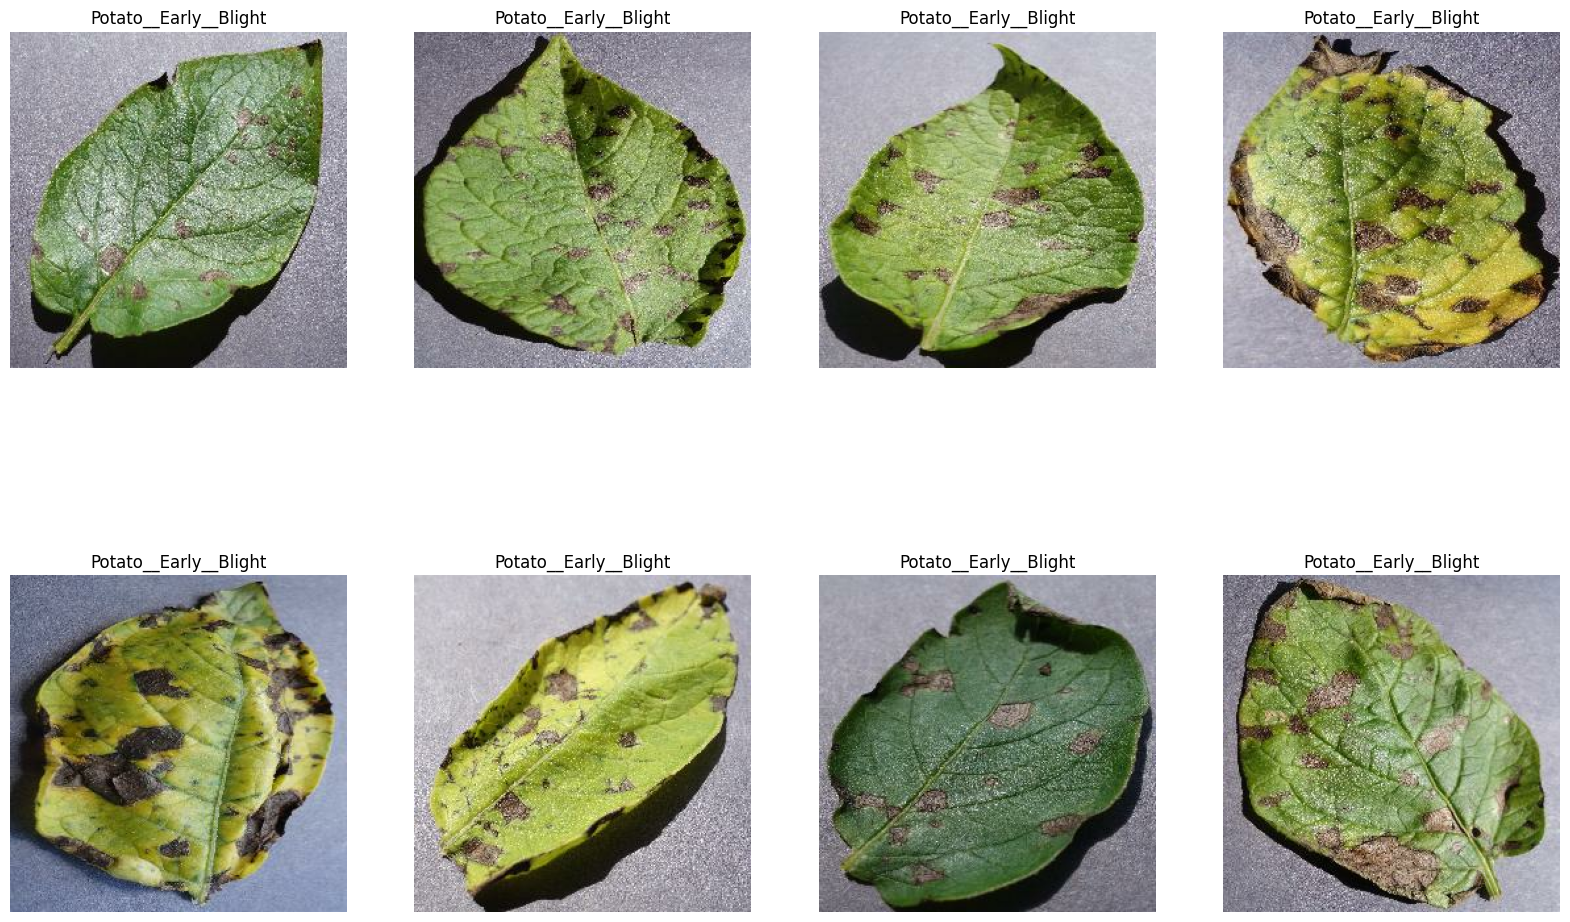

In [18]:
#It's the way to define where your new axes will be placed within the figure. The first digit means the amount of rows, the second the amount of columns. The figure will be equally divided based on the number of rows and columns you specify. The last digit will then 'pick' one of those places and return the axes for it. The number goes from the top-left to the bottom-right.
plt.figure(figsize = (20,20))
counter = 0
for img_batch,lbl_batch in potato_data.take(2):
    #print(counter,":",img_batch.numpy().astype("uint8"))
    for i in range(8):
        plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))#img_batch[0]
        plt.title(class_names[lbl_batch[i]])# class_names[lbl_batch[0]] class_names[2]
        plt.axis("off")
    #print(counter,":",lbl_batch.numpy())
    #counter = counter+1
    #plt.imshow(img_batch[0].numpy().astype("uint8"))
    #print(0,":",lbl_batch.numpy())
    #plt.title(class_names[lbl_batch[7]])
    #plt.axis("off")

In [19]:
# train_data = int(len(potato_data)*.8)
# print("Train size: ",train_data)
# test_data = int(len(potato_data)*.1)
# print("Test size: ",test_data)
# val_data = len(potato_data)-train_data-test_data
# print("Validation size: ",val_data)
len(potato_data)

68

In [20]:
#Using method

def get_data_partitions(p_data,train_size,test_size):
    train_data = p_data.take(int(len(p_data)*train_size))
    #print("Train data:",train_data)
    test_data = p_data.take(int(len(p_data)*test_size))
    #print("Test data:",test_data)
    val_data = p_data.skip(len(train_data)+len(test_data))
    #print("Validation size:",val_data)
    return train_data, test_data, val_data

In [21]:
#Same variables were not working
train,test,val = get_data_partitions(potato_data,0.8,0.1)
print("Train size: ",len(train))
print("Test size: ",len(test))
print("Validation size: ",len(val))

Train size:  54
Test size:  6
Validation size:  8


In [22]:
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)